In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
a = pd.read_excel("백신별일일접종현황_20230717.xls")

In [4]:
a = a.iloc[::-1]
a = a.reset_index()
a = a.iloc[:,1:]
a = a.iloc[:-1]

In [5]:
a["year"] = 0
a["month"] = 0
a["day"] = 0

In [6]:
a["일자"] = pd.to_datetime(a["일자"])

In [7]:
a["year"] = a["일자"].dt.year
a["month"] = a["일자"].dt.month
a["day"] = a["일자"].dt.day

In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   일자               863 non-null    datetime64[ns]
 1   전체 1차            863 non-null    int64         
 2   전체 2차            863 non-null    int64         
 3   화이자 1차           863 non-null    int64         
 4   화이자 2차           863 non-null    int64         
 5   모더나 1차           863 non-null    int64         
 6   모더나 2차           863 non-null    int64         
 7   아스트라제네카 1차       863 non-null    int64         
 8   아스트라제네카 2차       863 non-null    int64         
 9   얀센 1차·2차         863 non-null    int64         
 10  노바백스 1차          863 non-null    int64         
 11  노바백스 2차          863 non-null    int64         
 12  스카이코비원 1차        863 non-null    int64         
 13  스카이코비원 2차        863 non-null    int64         
 14  기타 1차            863 non-null    int64    

In [9]:
a = a.iloc[:,[1,2,23,24,25]]

In [10]:
order = ["year", "month", "day", "전체 1차", "전체 2차"]
a = a[order]

In [11]:
a["누적1차"] = 0
a["누적2차"] = 0

In [12]:
a["누적1차"] = a["전체 1차"].cumsum()
a["누적2차"] = a["전체 2차"].cumsum()

In [13]:
a = a.iloc[:,[0,1,2,-2,-1]]

In [14]:
a

,year,month,day,누적1차,누적2차
0,2021,2,26,39154,11396
1,2021,2,27,40897,11619
2,2021,2,28,41922,11727
3,2021,3,1,43846,11994
4,2021,3,2,108538,12305
...,...,...,...,...,...
858,2023,7,4,44742071,44331406
859,2023,7,5,44742096,44331426
860,2023,7,6,44742119,44331452
861,2023,7,7,44742137,44331488


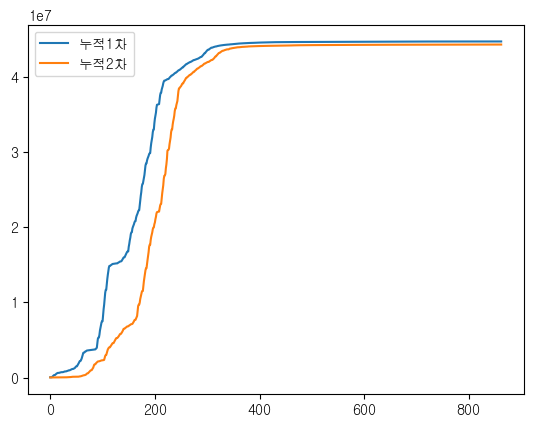

In [15]:
a["누적1차"].plot()
a["누적2차"].plot()
plt.legend(loc="upper left")
plt.show()

In [17]:
a.to_csv("Project_vaccine.csv", index = False, encoding = "euc-kr")